In [1]:
%cd ../..

C:\Users\ManuJoseph\OneDrive - Thoucentric\Work\Projects\Playground\AdvancedTimeSeriesForecastingBook\Github\Modern-Time-Series-Forecasting-with-Python-


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from tqdm.autonotebook import tqdm
import os
from pathlib import Path
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\ManuJoseph\AppData\Local\Temp\ipykernel_47292\2628223666.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
os.makedirs("imgs/chapter_17", exist_ok=True)
preprocessed = Path("data/london_smart_meters/preprocessed")
output = Path("data/london_smart_meters/output")

In [4]:
from itertools import cycle
def format_plot(fig, legends=None, xlabel="Time", ylabel="Value", title="", font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t: t.update(name=next(names)))
    fig.update_layout(
        autosize=False,
        width=900,
        height=500,
        title_text=title,
        title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
        titlefont={"size": title_font_size},
        legend_title=None,
        legend=dict(
            font=dict(size=font_size),
            orientation="h",
            yanchor="bottom",
            y=0.9,
            xanchor="right",
            x=1,
        ),
        yaxis=dict(
            title_text=ylabel,
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        ),
        xaxis=dict(
            title_text=xlabel,
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        )
    )
    return fig

In [5]:
def abs_percent_error(a, f):
    return (np.abs(a-f)/np.abs(a))

def squared_error(a,f):
    return np.power(a-f,2)

def abs_error(a,f):
    return np.abs(a-f)

def symmetric_error(a,f):
    return 2*np.abs(a-f)/(a+f)

In [6]:
intrinsic_metrics = [
"absolute_error",
"squared_error",
"absolute_percent_error",
"symmetric_error"]

## Loss Curve

### Creating a grid of actuals and forecast for plotting loss curve

In [7]:
a=20
df_metric_l = []
for e in np.arange(-10,11,1):
    f = a-e
    df_metric_l.append({
            "actuals":a,
            "forecast":f,
            "error": a-f,
            "absolute_percent_error": abs_percent_error(a,f),
            "squared_error": squared_error(a,f),
            "absolute_error": abs_error(a,f),
            "symmetric_error": symmetric_error(a,f),
        })
metric_df_a = pd.DataFrame(df_metric_l)
metric_df_a.head()

,actuals,forecast,error,absolute_percent_error,squared_error,absolute_error,symmetric_error
0,20,30,-10,0.50,100,10,0.400000
1,20,29,-9,0.45,81,9,0.367347
2,20,28,-8,0.40,64,8,0.333333
3,20,27,-7,0.35,49,7,0.297872
4,20,26,-6,0.30,36,6,0.260870


### Plotting the loss curves for each metric

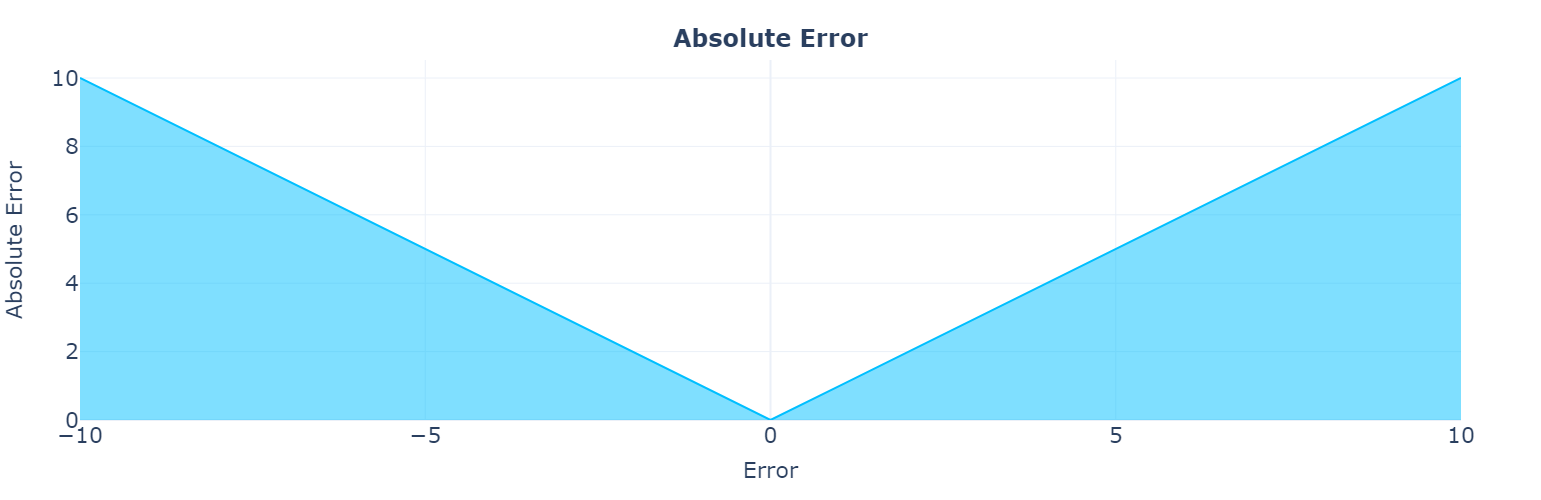

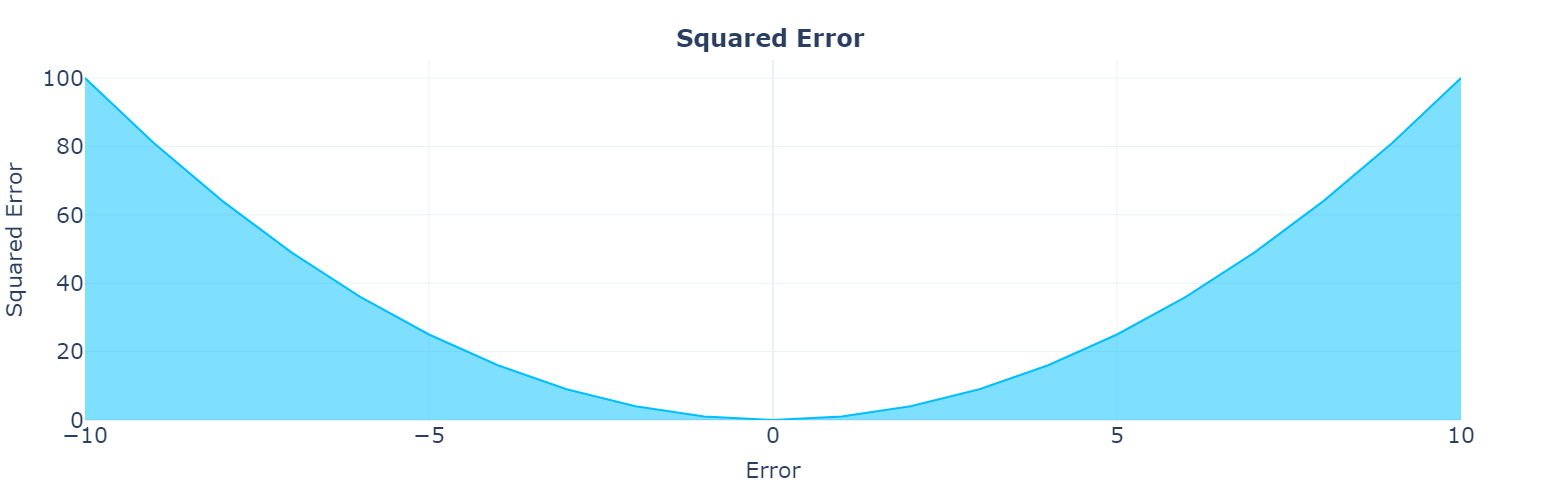

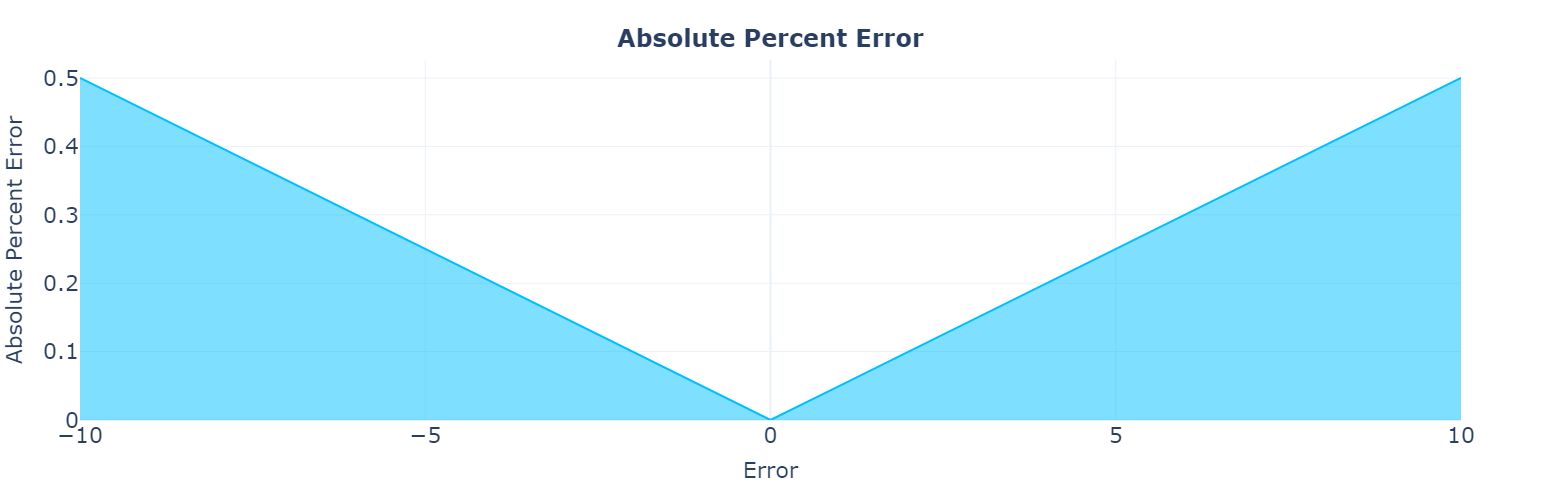

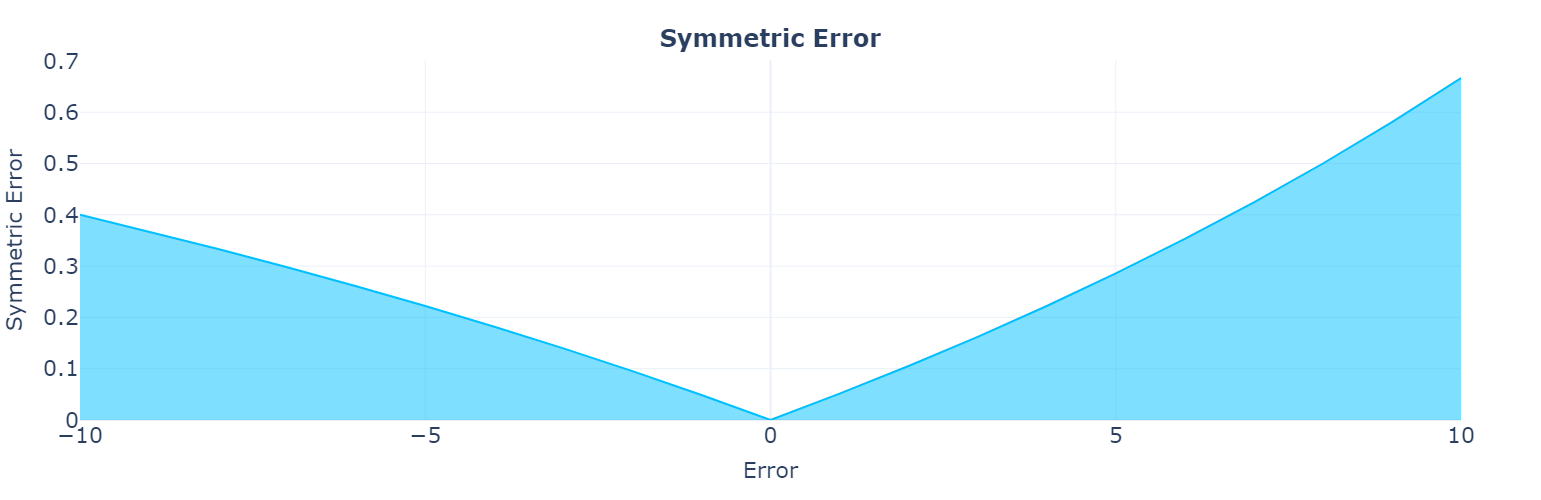

In [16]:
for metric in intrinsic_metrics:
    display_metric = metric.replace("_"," ").title()
    plot_df = metric_df_a[['error',metric]].sort_values("error")
    fig = px.area(plot_df,  y=metric, x="error",
                  template="plotly_white", color_discrete_sequence=["DeepSkyBlue"])
    fig = format_plot(fig, legends=None, xlabel="Error", ylabel=display_metric, title="<b>"+display_metric+"</b>", font_size=22, title_font_size=24)
    fig.write_image(f"imgs/chapter_17/{metric}_loss_curve.png")
    fig.show()

## Complementary Pairs

In [13]:
ts_actuals = ts_forecast = np.arange(0,10,1)
df_l = []
for a in ts_actuals:
    for f in ts_forecast:
        df_l.append({
            "actuals":a,
            "forecast":f,
            "error": a-f,
            "absolute_percent_error": abs_percent_error(a,f),
            "squared_error": squared_error(a,f),
            "absolute_error": abs_error(a,f),
            "symmetric_error": symmetric_error(a,f)
        })
res_df = pd.DataFrame(df_l)

C:\Users\ManuJoseph\AppData\Local\Temp\ipykernel_47292\3118641865.py:2: RuntimeWarning:

invalid value encountered in long_scalars

C:\Users\ManuJoseph\AppData\Local\Temp\ipykernel_47292\3118641865.py:11: RuntimeWarning:

invalid value encountered in long_scalars

C:\Users\ManuJoseph\AppData\Local\Temp\ipykernel_47292\3118641865.py:2: RuntimeWarning:

divide by zero encountered in long_scalars



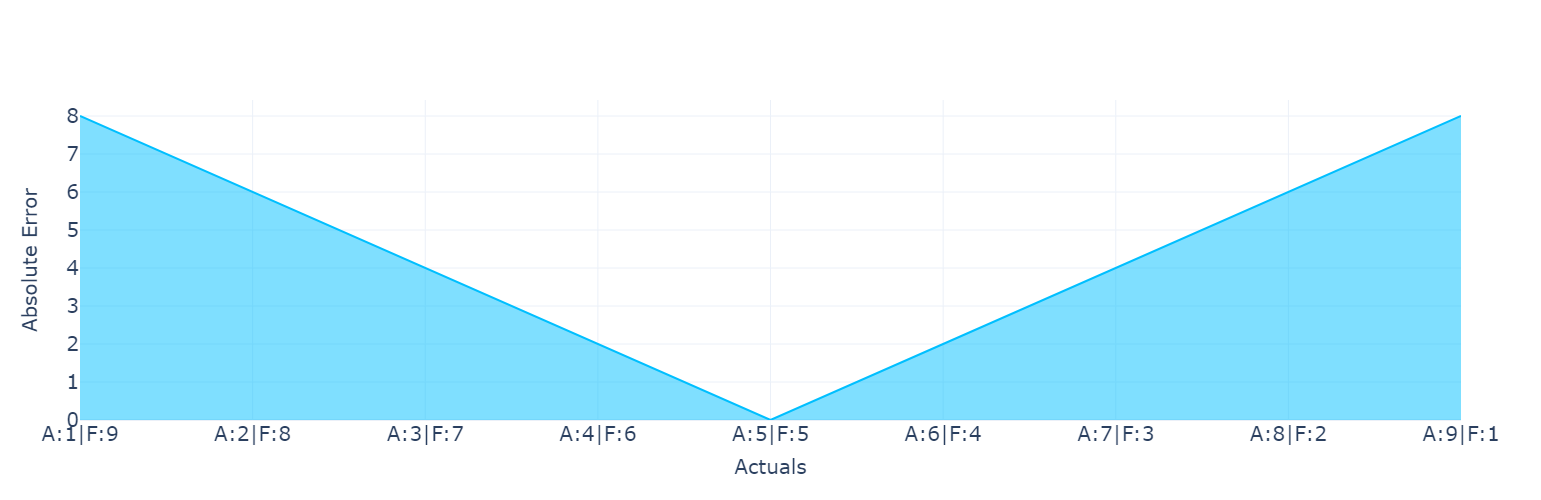

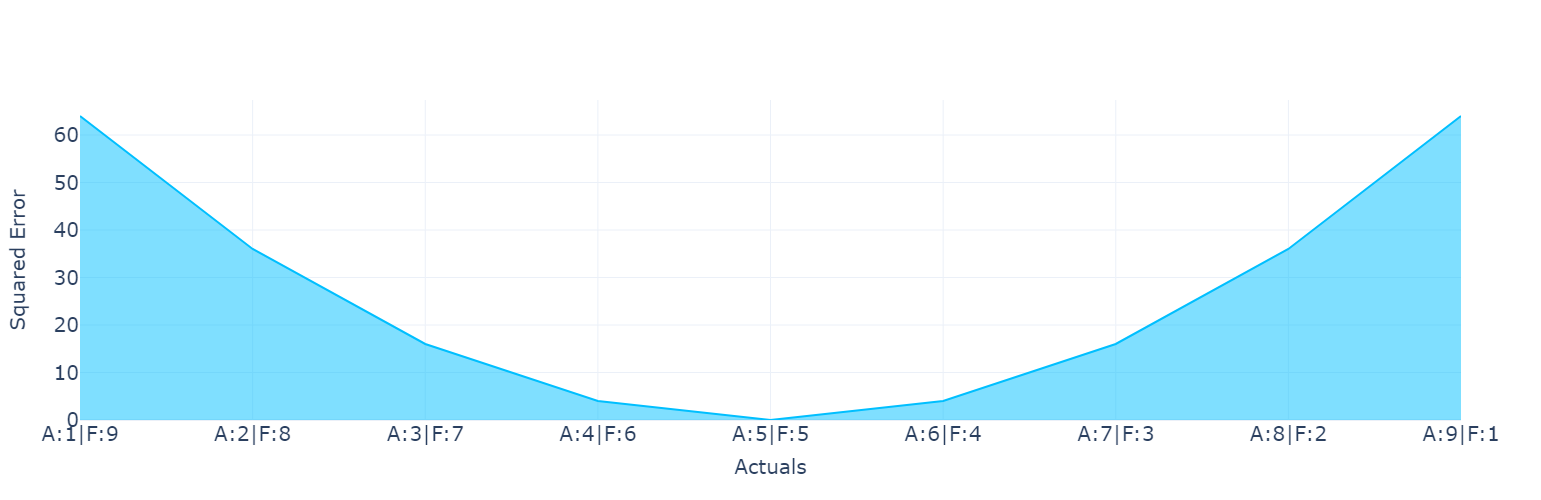

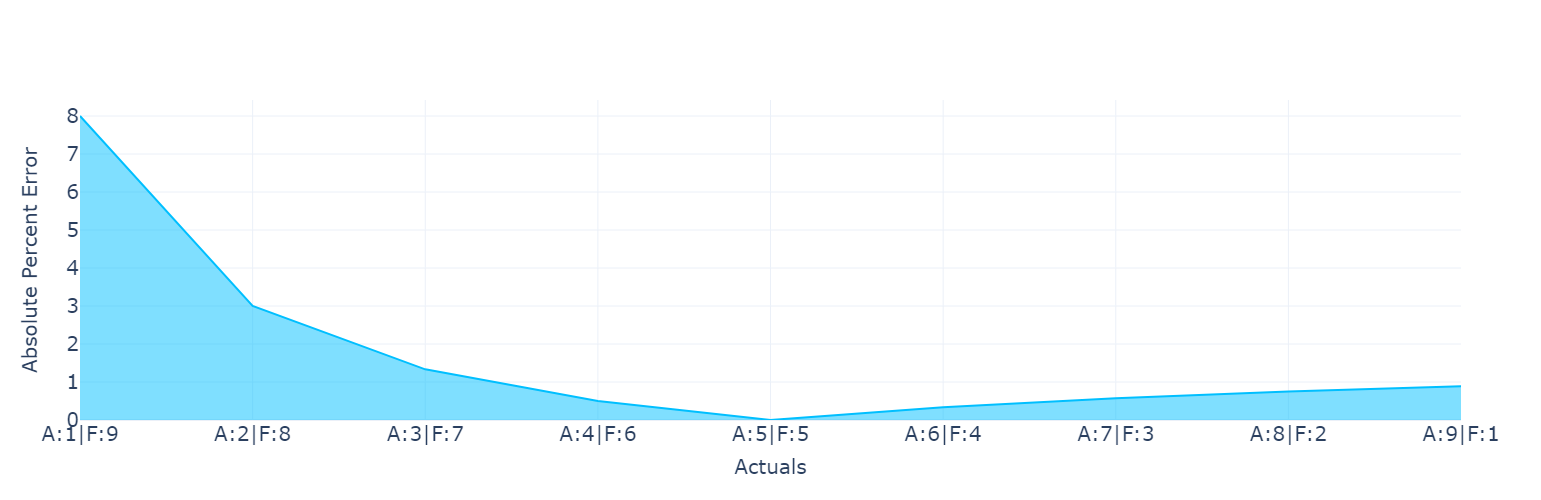

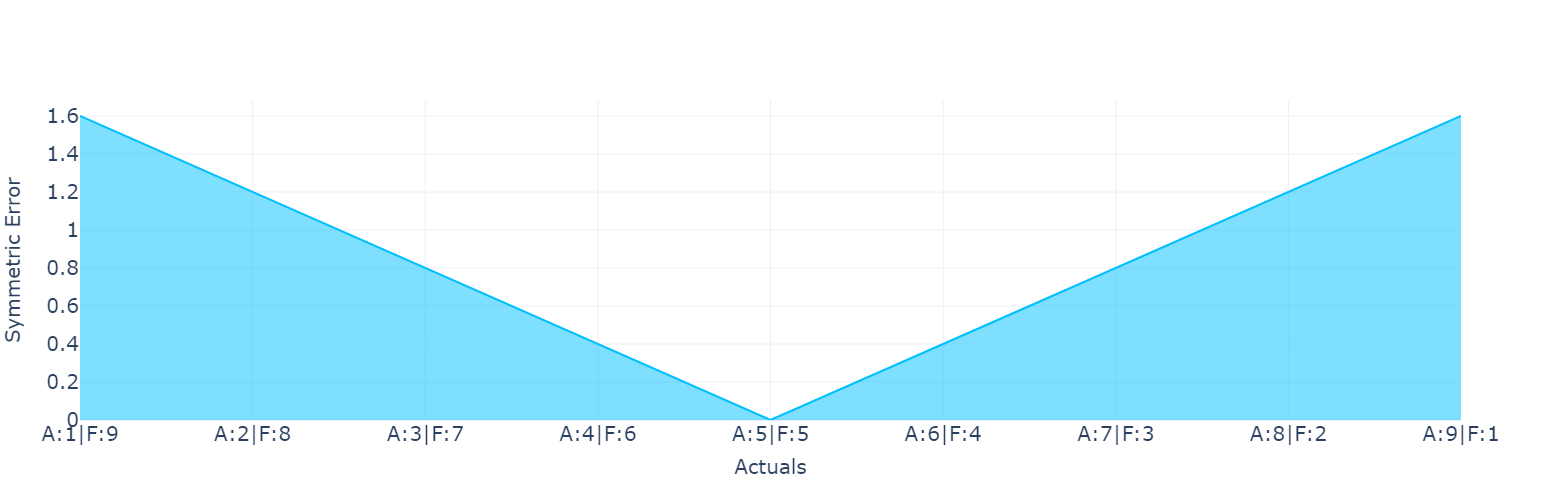

In [17]:
diagonal_df = res_df[(res_df.actuals+res_df.forecast)==10]
for metric in intrinsic_metrics:
    display_metric = metric.replace("_"," ").title()
    fig = px.area(diagonal_df, x="actuals", y=metric, title="<b>"+display_metric+"</b>",template="plotly_white", color_discrete_sequence=["DeepSkyBlue"])
    fig = format_plot(fig, legends=None, xlabel="Actuals", ylabel=display_metric, title="", font_size=20, title_font_size=24)
    fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals=[i for i in diagonal_df.actuals],
            ticktext = [f"A:{i}|F:{10-i}" for i in diagonal_df.actuals]
        )
    )
    fig.write_image(f"imgs/chapter_17/{metric}_complementarity.png")

    fig.show()

# Loss Curves for Relative Measures

In [21]:
def relative_absolute_error(a,f, f_star):
    return np.abs(a-f)/(a-f_star)

def absolute_scaled_error(a,f, scale):
    return np.abs(a-f)/scale

In [26]:
actuals = np.arange(0,10)
forecast = np.arange(0,10)
forecast_star = np.arange(0,10)

# We consider the scale to be constant because it is
# the in-sample MAE and not changing
scale = 1

In [27]:
a=20
res_l = []
for e in np.arange(-10,11,1):
    f = a-e
    for f_star in forecast_star:
            res_l.append({
                "e":e,
                "f_star": f_star,
                "Relative Absolute Error" : relative_absolute_error(a,f,f_star),
                "Absolute Scaled Error" : absolute_scaled_error(a,f,scale),
            })
res_df = pd.DataFrame(res_l)
res_df.sample(10)

,e,f_star,Relative Absolute Error,Absolute Scaled Error
9,-10,9,0.909091,10.0
192,9,2,0.500000,9.0
35,-7,5,0.466667,7.0
177,7,7,0.538462,7.0
11,-9,1,0.473684,9.0
25,-8,5,0.533333,8.0
176,7,6,0.500000,7.0
203,10,3,0.588235,10.0
197,9,7,0.692308,9.0
173,7,3,0.411765,7.0


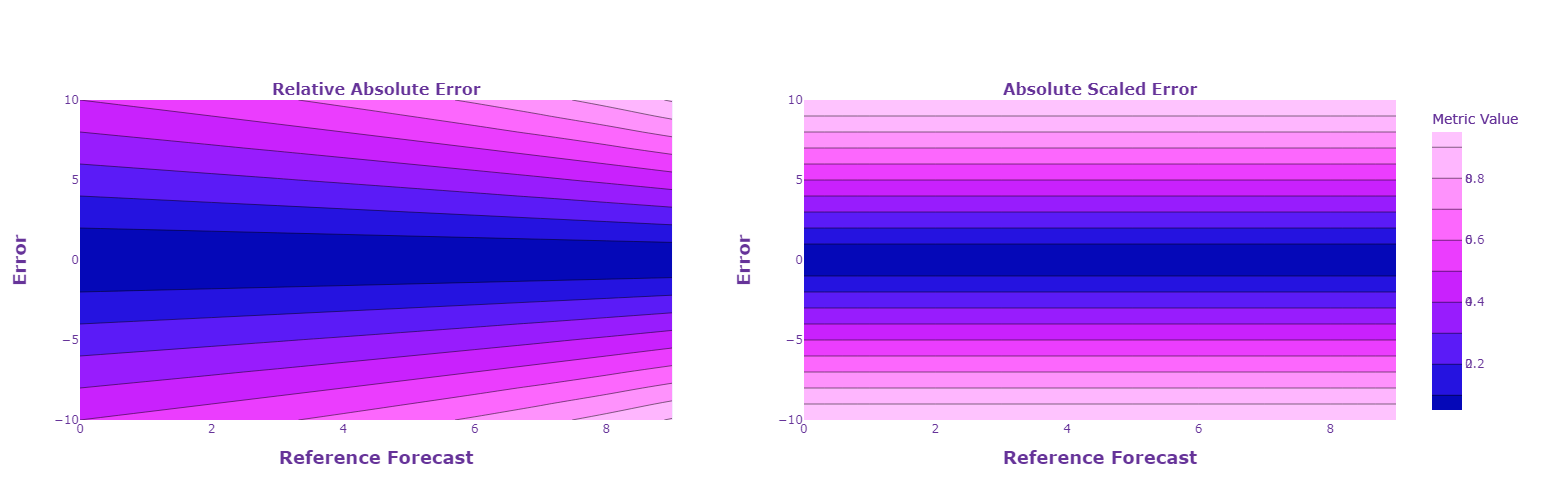

In [41]:
font_size = 18
plots = {}
for col in ["Relative Absolute Error", "Absolute Scaled Error"]:
    plot_df = pd.pivot_table(res_df, index="e", columns="f_star", values=col)
    f = go.Contour(
        z=plot_df.values,
        x=plot_df.columns,  # horizontal axis
        y=plot_df.index,  # vertical axis
        showscale=True,
        colorscale="Plotly3",
        colorbar=dict(
        title="Metric Value",
    )
    )
    plots[col] = f

# Initialize figure with subplots
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("<b>Relative Absolute Error</b>", "<b>Absolute Scaled Error</b>"),
)


fig.add_trace(plots["Relative Absolute Error"], row=1, col=1)
fig.update_yaxes(
    title_text="<b>Error</b>", titlefont=dict(size=font_size), row=1, col=1
)
fig.update_xaxes(
    title_text="<b>Reference Forecast</b>", titlefont=dict(size=font_size), row=1, col=1
)
fig.add_trace(plots["Absolute Scaled Error"], row=1, col=2)
fig.update_yaxes(
    title_text="<b>Error</b>", titlefont=dict(size=font_size), row=1, col=2
)
fig.update_xaxes(
    title_text="<b>Reference Forecast</b>", titlefont=dict(size=font_size), row=1, col=2
)

fig.update_layout(
    height=500,
    width=900,
    font=dict(color="RebeccaPurple"),
)
fig.write_image(f"imgs/chapter_17/rae_ase_symmetry.png")

fig.show()